<a href="https://colab.research.google.com/github/chavesana/INF502-Fall22/blob/main/notebooks/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring data using Pandas

![Pandas](pandas.jpg)

So far we explored Python and a few native libraries. Now we will play a little to simplify our life with tools to conduct some **data analysis**.

**Pandas** is the most popular library (so far) for data analysis in Python. To install pandas, use the following command:

```{python}
pip install pandas
```

If you don't have `pip` and wish to use another installation tool, please check [this tutorial](https://pandas.pydata.org/docs/getting_started/install.html).

For the visualization section, you may need to install the `matplotlib` library with the command

```{python}
python -m pip install -U matplotlib
```

### Let's import some data from a CSV file

**Note**: to follow this lecture, you also have to download the files [commits_pr.csv](data/commits_pr.csv) and `commit_complete.csv` from the Readings session, which has the data we will use for the analysis.

In [ ]:
import pandas
cpr = pandas.read_csv("commits_pr.csv")

Yes, it became this easy to read a CSV file! And there is more into it!

Look at what the `cpr` variable is:

In [ ]:
#print the type of the variable cpr
type(cpr)

pandas.core.frame.DataFrame

`cpr` is a DataFrame, which is a very convenient way to work with tabular data. In our code, a data frame looks like this:

In [ ]:
cpr.head() # head() shows only the very first rows of the table

,user,project_name,prog_lang,pull_req_number,num_commits
0,user1,php-src,C,122,1
1,user2,activeadmin,ruby,3325,1
2,user3,YouCompleteMe,python,2128,2
3,user4,requests,python,2663,1
4,user5,ipython,python,7901,1


In [ ]:
cpr.tail() #tail() shows only the very last rows of the table

,user,project_name,prog_lang,pull_req_number,num_commits
42087,user36933,node,javascript,14285,1
42088,user36934,react,javascript,8762,2
42089,user36934,rails,ruby,27508,1
42090,user36935,cocos2d-x,C++,15047,1
42091,user36936,node,javascript,9508,2


Before moving forward, let's understand what this dataset is about.

The dataset represents a series of pull-requests made to a subset of projects hosted by GitHub. In some past research, a team of researchers worked on this data to capture a specific type of contributor, which they called *casual contributor*. These contributors are known by having a single pull request accepted in a project and not coming back (i.e., they have no long-term commitment to the project).

The dataset contains the following columns:

* `user`: represent a user in GitHub (anonymized here)
* `project_name`: the name of GitHub project in which the pull request was accepted
* `prog_lang`: programming language of the project
* `pull_req_num`: unique identifier of the pull request
* `num_commits`: number of commits sent within that specific pull request

### Some information about the dataframe

Let's explore the dataset. First, let's check the dimensions/shape of the dataset (lines vs. columns)

In [ ]:
cpr.shape

(42092, 5)

What about the column names?

In [ ]:
cpr.columns

Index(['user', 'project_name', 'prog_lang', 'pull_req_number', 'num_commits'], dtype='object')

And the datatype per column?

In [ ]:
cpr.dtypes

user               object
project_name       object
prog_lang          object
pull_req_number     int64
num_commits         int64
dtype: object

Some more information: `info()` method prints information including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
cpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42092 entries, 0 to 42091
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user             42092 non-null  object
 1   project_name     42092 non-null  object
 2   prog_lang        42092 non-null  object
 3   pull_req_number  42092 non-null  int64 
 4   num_commits      42092 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


What is the type of a specific column?

In [ ]:
type(cpr["num_commits"])

pandas.core.series.Series

A *serie* is an indexed, one-dimensional list. Each dataframe's column is a series.

We can use the types to filter some columns. Let's say we want only the columns that store `int`:

In [ ]:
int_columns = cpr.dtypes[cpr.dtypes == "int64"].index
int_columns

Index(['pull_req_number', 'num_commits'], dtype='object')

Now that I have the index, I want to see only these columns (I will print just the head, so we don't have 42K rows in the output).

In [ ]:
cpr[int_columns].head()

,pull_req_number,num_commits
0,122,1
1,3325,1
2,2128,2
3,2663,1
4,7901,1


### What about statistical information about my DataFrame?

These information about the dataframe is useful, but we usually want some descriptive statistics of the data. The `describe()` method provides a summary of numeric values in your dataset: mean, standard deviation, minimum, maximum, 1st quartile, 2nd quartile (median), 3rd quartile of the columns with numeric values. It also counts the number of variables in the dataset (**Note:** where are the other variables we saw before?)

In [ ]:
cpr.describe()

,pull_req_number,num_commits
count,42092.000000,42092.000000
mean,4452.145681,3.824242
std,6152.304478,20.760123
min,1.000000,1.000000
25%,628.000000,1.000000
50%,2007.000000,1.000000
75%,5534.250000,2.000000
max,38174.000000,385.000000


We can do the same thing for a Series, instead of using the whole dataset.

In [ ]:
#cpr["num_commits"].describe()
cpr.num_commits.describe()

count    42092.000000
mean         3.824242
std         20.760123
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        385.000000
Name: num_commits, dtype: float64

In [ ]:
#LOOK at this with a non-numeric column
cpr.prog_lang.describe() #either way work.

count     42092
unique       17
top        ruby
freq       8147
Name: prog_lang, dtype: object

If you don't want the entire set of descriptive statistics, you can ask for a specific information per column.

In [ ]:
cpr.num_commits.median() #median of the number of commits

1.0

In [ ]:
cpr.num_commits.mean() #mean of the number of commits

3.8242421362729258

In [ ]:
cpr.num_commits.std() #standard deviation for the number of commits

20.760123357074704

### Playing with the data: sorting

We can sort our data easily using pandas. In this example, let's sort the number of commits in descending order.

In [ ]:
cpr.sort_values("num_commits", ascending=False).head(10)

,user,project_name,prog_lang,pull_req_number,num_commits
38987,user34165,three.js,javascript,7832,385
705,user640,cocos2d-x,C++,6866,364
7335,user6426,redis,C,3506,315
19587,user17126,jenkins,java,2718,307
35826,user31347,redis,C,3230,290
13300,user11672,cocos2d-x,C++,16576,281
3601,user3214,three.js,javascript,7808,277
13873,user12167,spring-framework,java,642,273
26360,user23077,Faker,php,660,259
18632,user16293,libgdx,java,814,258


Let's pull up the entire dataset again, so we can play with other variables.

In [ ]:
cpr = pandas.read_csv("commits_pr.csv")

Now let's sort the data by the Programming language in ascending order.

In [ ]:
cpr.sort_values("prog_lang", ascending=False).head(10)

,user,project_name,prog_lang,pull_req_number,num_commits
7862,user6897,winjs,typescript,1515,2
35930,user31440,shumway,typescript,1333,3
15621,user13681,doppio,typescript,415,2
4628,user4086,tsd,typescript,251,2
40003,user35064,litecoin,typescript,279,5
29153,user25548,primecoin,typescript,1,1
11557,user10154,doppio,typescript,331,1
16120,user14127,TypeScript,typescript,14811,2
26882,user23548,shumway,typescript,1767,1
40005,user35066,TypeScript,typescript,5879,44


We can sort using *many columns*, by using a list (sort will happen from the first item to the last).

In [ ]:
cpr.sort_values(["prog_lang", "project_name", "num_commits"], ascending=True).head(10)

,user,project_name,prog_lang,pull_req_number,num_commits
2465,user2213,ccv,C,83,1
14883,user13025,ccv,C,4,1
21334,user18630,ccv,C,19,1
21728,user18978,ccv,C,132,1
39827,user34908,ccv,C,150,1
9227,user8102,ccv,C,8,2
19078,user16695,ccv,C,195,2
21786,user19026,ccv,C,141,2
26265,user23003,ccv,C,161,2
130,user115,ccv,C,31,3


Now, the sorting creates only a view of the data, but does not change the dataset itself.

In [ ]:
cpr.head(10)

,user,project_name,prog_lang,pull_req_number,num_commits
0,user1,php-src,C,122,1
1,user2,activeadmin,ruby,3325,1
2,user3,YouCompleteMe,python,2128,2
3,user4,requests,python,2663,1
4,user5,ipython,python,7901,1
5,user6,haste-compiler,haskell,407,1
6,user7,select2,javascript,1987,1
7,user8,django,python,8608,3
8,user9,folly,C++,206,1
9,user10,django,python,4745,2


If you want to keep the sorted version, you can use the parameter `inplace`:

In [ ]:
cpr.sort_values(["prog_lang", "project_name", "num_commits"], ascending=False, inplace=True)
cpr.head(10)
#cpr = pandas.read_csv("commits_pr.csv") #--> to return to the original order

,user,project_name,prog_lang,pull_req_number,num_commits
14351,user12556,winjs,typescript,678,11
40943,user35906,winjs,typescript,1609,10
35890,user31404,winjs,typescript,565,6
1800,user1614,winjs,typescript,1179,3
20245,user17684,winjs,typescript,1559,3
29167,user25562,winjs,typescript,30,3
4780,user4214,winjs,typescript,44,2
5142,user4533,winjs,typescript,185,2
7862,user6897,winjs,typescript,1515,2
32077,user28045,winjs,typescript,428,2


### Counting the occurences of variables

To count the occurrences in a column we have to select the column first, and use the method `value_counts()`

In [ ]:
cpr.prog_lang.value_counts()

ruby            8147
javascript      7052
python          4092
php             4069
C++             2785
java            2596
C               2196
go              2103
coffeescript    2066
scala           1823
objective-c     1801
haskell          950
clojure          882
perl             663
erlang           500
typescript       343
Perl              24
Name: prog_lang, dtype: int64

If we don't want the counts, just the language, then we can use the `unique()` function.

In [ ]:
cpr["prog_lang"].unique()

array(['typescript', 'scala', 'ruby', 'python', 'php', 'perl',
       'objective-c', 'javascript', 'java', 'haskell', 'go', 'erlang',
       'coffeescript', 'clojure', 'Perl', 'C++', 'C'], dtype=object)

## Selecting columns and filtering data

Let's say that I just want to look at the columns programming language, project name and number of commits. I can select them and create a new, smaller dataframe.

In [ ]:
selected_columns = ["prog_lang", "project_name", "num_commits"]
my_subset = cpr[selected_columns]
my_subset.head()

,prog_lang,project_name,num_commits
14351,typescript,winjs,11
40943,typescript,winjs,10
35890,typescript,winjs,6
1800,typescript,winjs,3
20245,typescript,winjs,3


But that gives me all the information about the selected columns. What if now I want to filter out only those projects written in `C` language?

In [ ]:
only_C = cpr[(cpr["prog_lang"]=='C') & (cpr["num_commits"]==2)] #I don't need the column name anymore, it's just C!
only_C.describe()

,pull_req_number,num_commits
count,389.000000,389.0
mean,3815.380463,2.0
std,3264.957089,0.0
min,3.000000,2.0
25%,1061.000000,2.0
50%,2860.000000,2.0
75%,5831.000000,2.0
max,12724.000000,2.0


We can filter whatever we want, for example, let's filter only when the number of commits is equal to 1 (_the casual contributors_).

In [ ]:
single_commit = cpr[cpr["num_commits"] == 1]
single_commit.describe()

,pull_req_number,num_commits
count,29655.000000,29655.0
mean,4183.982769,1.0
std,6036.266784,0.0
min,1.000000,1.0
25%,566.000000,1.0
50%,1768.000000,1.0
75%,4969.500000,1.0
max,38174.000000,1.0


We can create filters in variables, and use whenever we want.

In [ ]:
one_commit = cpr["num_commits"]==1
language_C = cpr["prog_lang"]=="C"
multi_commit = cpr["num_commits"]>1

In [ ]:
cpr[one_commit & language_C].head(10)

,user,project_name,prog_lang,pull_req_number,num_commits
1625,user1464,twemproxy,C,284,1
1696,user1526,twemproxy,C,224,1
2259,user2025,twemproxy,C,398,1
2522,user2268,twemproxy,C,387,1
3210,user2872,twemproxy,C,311,1
3946,user3515,twemproxy,C,366,1
4774,user4209,twemproxy,C,291,1
5802,user5103,twemproxy,C,3,1
7326,user6419,twemproxy,C,58,1
7811,user6850,twemproxy,C,217,1


And we can use logical operators like OR (`|`) and AND (`&`) to create a filtering expression.

In [ ]:
cpr[one_commit & language_C].head(10)

As another example, let's filter the pull requests with more than one commit for the projects written in C and those with 2 commits for the projects written in "typescript".

In [ ]:
two_commits = cpr["num_commits"]==2
language_typescript = cpr["prog_lang"]=="typescript"

In [ ]:
cpr[(one_commit & language_C) | (two_commits & language_typescript)].head()

In [ ]:
cpr[(one_commit & language_C) | (two_commits & language_typescript)].tail()

Now, imagine that I want to convert the number of commits into a feature by creating bands of values that we define:
    
 * 1 commit = group 1
 * 2 - 5 commits = group 2
 * 6 - 20 commits = group 3
 *  more than 20 = group 4

We will use `loc` to achieve that!

In [ ]:
cpr = pandas.read_csv("commits_pr.csv")

cpr.loc[cpr["num_commits"]==1, "group_commit"]=1
cpr.loc[(cpr["num_commits"]>1) & (cpr["num_commits"]<=5), "group_commit"]=2
cpr.loc[(cpr["num_commits"]>5) & (cpr["num_commits"]<=20), "group_commit"]=3
cpr.loc[cpr["num_commits"]>20, "group_commit"]=4
cpr.group_commit = cpr.group_commit.astype('int32')

In [ ]:
cpr.head()

,user,project_name,prog_lang,pull_req_number,num_commits,group_commit
0,user1,php-src,C,122,1,1
1,user2,activeadmin,ruby,3325,1,1
2,user3,YouCompleteMe,python,2128,2,2
3,user4,requests,python,2663,1,1
4,user5,ipython,python,7901,1,1


Let's work with a new dataset. This is not only related to casual contributors, but all contributors. Let's check the correlation between two columns using the `corr()` function.

In [ ]:
commits_complete = pandas.read_csv('commit_complete.csv')
commits_complete.sort_values('num_commits', ascending=False).head(10)

,user,project_name,prog_lang,num_commits,additions,deletions,files_changed,num_comments
52041,user_13168,cocos2d-x,C++,10000.0,1320472.0,24870.0,5865.0,0.0
52036,user_13168,cocos2d-x,C++,10000.0,1321513.0,24870.0,5905.0,0.0
54883,user_13227,cocos2d-x,C++,10000.0,1549480.0,843841.0,9726.0,0.0
52033,user_13168,cocos2d-x,C++,10000.0,1320976.0,24870.0,5892.0,0.0
61760,user_13751,cocos2d-x,C++,10000.0,1163795.0,24870.0,5241.0,0.0
52034,user_13168,cocos2d-x,C++,10000.0,1321296.0,24870.0,5905.0,0.0
61813,user_13757,cocos2d-x,C++,10000.0,1324952.0,24870.0,5903.0,0.0
52035,user_13168,cocos2d-x,C++,10000.0,1321419.0,24870.0,5890.0,0.0
61841,user_13764,cocos2d-x,C++,10000.0,1539898.0,21568.0,6574.0,0.0
54495,user_13188,cocos2d-x,C++,10000.0,1249461.0,1129333.0,8848.0,0.0


In [ ]:
commits_complete['num_commits'].corr(commits_complete['additions'])

0.6573205139433458

In [ ]:
commits_complete.corr(method='pearson') #correlation table using the pearson method

,num_commits,additions,deletions,files_changed,num_comments
num_commits,1.000000,0.657321,0.151074,0.605152,-0.007297
additions,0.657321,1.000000,0.244859,0.749543,-0.002682
deletions,0.151074,0.244859,1.000000,0.566905,0.011876
files_changed,0.605152,0.749543,0.566905,1.000000,0.003657
num_comments,-0.007297,-0.002682,0.011876,0.003657,1.000000


### Visualization

**Plot types:**
- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot
- 'hexbin' : hexbin plot

**Histogram**

<AxesSubplot:ylabel='Frequency'>

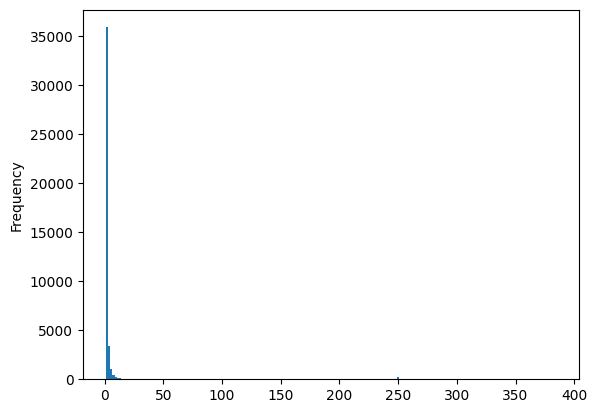

In [ ]:
import matplotlib
cpr.num_commits.plot.hist(bins=200)

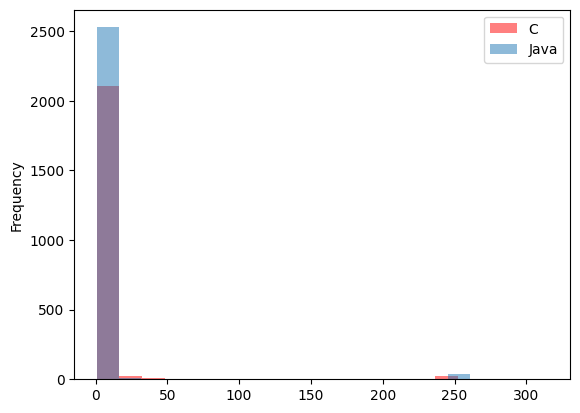

In [ ]:
cpr[cpr["prog_lang"]=="C"].num_commits.plot.hist(bins=20, color="red", alpha=0.5)
cpr[cpr["prog_lang"]=="java"].num_commits.plot.hist(bins=20, alpha=0.5).legend(["C", "Java"])

<AxesSubplot:>

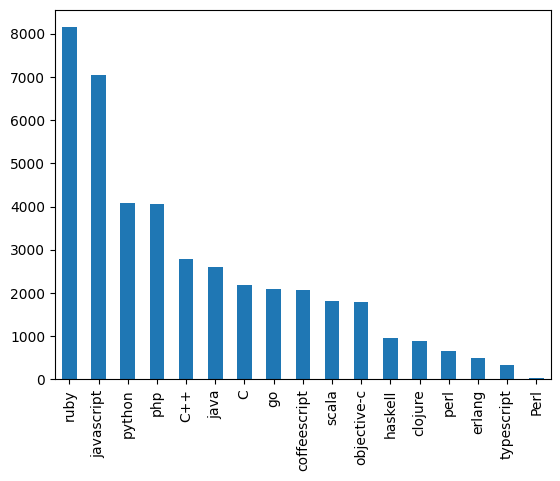

In [ ]:
cpr['prog_lang'].value_counts().plot.bar()

<AxesSubplot:>

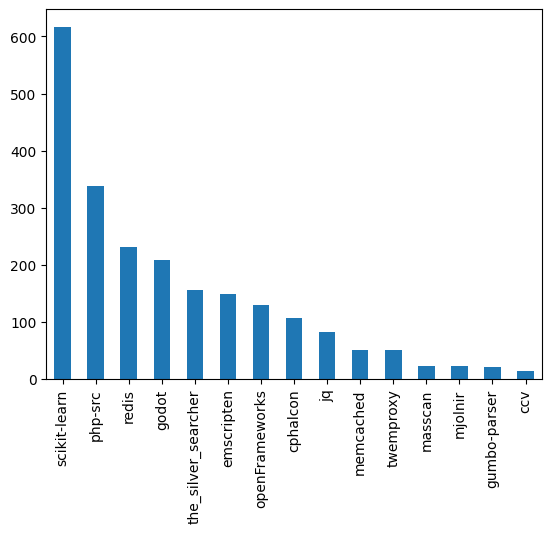

In [ ]:
cpr[cpr["prog_lang"]== "C"].project_name.value_counts().plot.bar()

<AxesSubplot:xlabel='files_changed', ylabel='num_commits'>

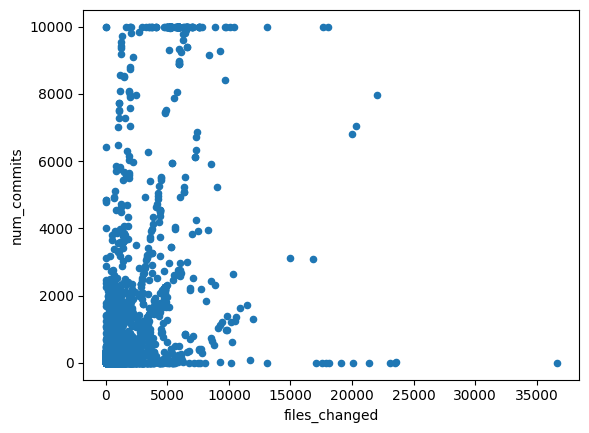

In [ ]:
commits_complete.plot.scatter(x = "files_changed", y = "num_commits")

<AxesSubplot:title={'center':'num_commits'}, xlabel='prog_lang'>

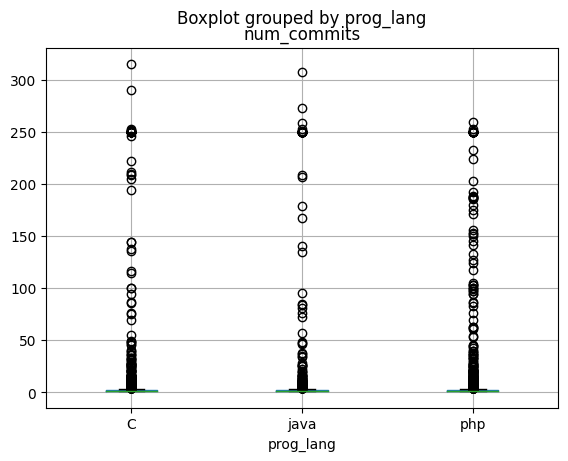

In [ ]:
lang_c = cpr.prog_lang=="C"
lang_java = cpr.prog_lang=="java"
lang_php = cpr.prog_lang=="php"


cpr[(lang_c) | (lang_java) | (lang_php)].boxplot(by='prog_lang', column=['num_commits'])

Text(0.5, 1.0, '')

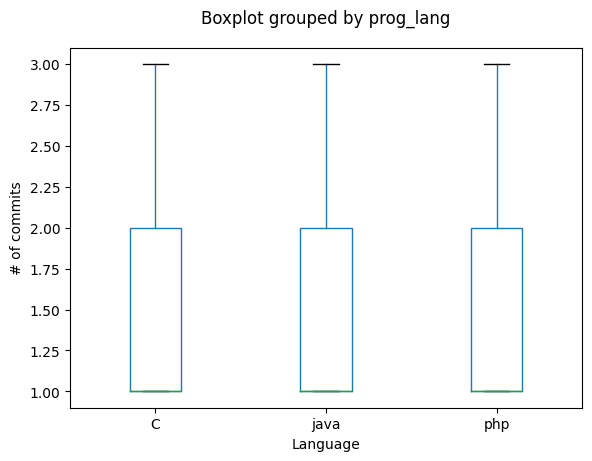

In [ ]:
plot = cpr[(lang_c) | (lang_java) | (lang_php)].boxplot(by='prog_lang', column=['num_commits'], showfliers=False, grid=False)

plot.set_xlabel("Language")
plot.set_ylabel("# of commits")
plot.set_title("")

**Just to show...**

that it is possible to do statistical analysis

In [ ]:
from scipy import stats

stats.mannwhitneyu(cpr[(lang_c)].num_commits, cpr[(lang_java)].num_commits)

### Exporting

After we clean and reshape our data to make it useful in our project, we usually want to save the improved dataset. That's when we export the dataframe back to CSV file, which is a data exchange format.

In [ ]:
my_subset

,prog_lang,project_name,num_commits
14351,typescript,winjs,11
40943,typescript,winjs,10
35890,typescript,winjs,6
1800,typescript,winjs,3
20245,typescript,winjs,3
...,...,...,...
2465,C,ccv,1
14883,C,ccv,1
21334,C,ccv,1
21728,C,ccv,1


In [ ]:
my_subset.to_dict()

In [ ]:
cpr.to_csv('test.csv', sep=',')